In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StringType

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

In [3]:
spark = SparkSession.builder.master("local[2]").appName('car_accidents').getOrCreate()

In [4]:
df = spark.read.csv('C:/Users/a842488/OneDrive - Atos/Desktop/Project', inferSchema='True', header=True)
df = df.sample(0.05)

# Data Analysis

In [5]:
df.dtypes

[('ID', 'string'),
 ('Severity', 'int'),
 ('Start_Time', 'string'),
 ('End_Time', 'string'),
 ('Start_Lat', 'double'),
 ('Start_Lng', 'double'),
 ('End_Lat', 'double'),
 ('End_Lng', 'double'),
 ('Distance(mi)', 'double'),
 ('Description', 'string'),
 ('Number', 'double'),
 ('Street', 'string'),
 ('Side', 'string'),
 ('City', 'string'),
 ('County', 'string'),
 ('State', 'string'),
 ('Zipcode', 'string'),
 ('Country', 'string'),
 ('Timezone', 'string'),
 ('Airport_Code', 'string'),
 ('Weather_Timestamp', 'string'),
 ('Temperature(F)', 'double'),
 ('Wind_Chill(F)', 'double'),
 ('Humidity(%)', 'double'),
 ('Pressure(in)', 'double'),
 ('Visibility(mi)', 'double'),
 ('Wind_Direction', 'string'),
 ('Wind_Speed(mph)', 'double'),
 ('Precipitation(in)', 'double'),
 ('Weather_Condition', 'string'),
 ('Amenity', 'boolean'),
 ('Bump', 'boolean'),
 ('Crossing', 'boolean'),
 ('Give_Way', 'boolean'),
 ('Junction', 'boolean'),
 ('No_Exit', 'boolean'),
 ('Railway', 'boolean'),
 ('Roundabout', 'boolean')

In [6]:
df.limit(5).toPandas().head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-8,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375,-81.820,41.368,-81.822,0.521,At Bagley Rd/Exit 235 - Accident.,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-77,2,2016-02-10 17:30:32,2016-02-10 23:30:32,41.036,-81.578,41.041,-81.612,1.803,Between OH-619/Wooster Rd/Exit 17 and Barber Rd/Exit 16 - Accident. in the left lane.,NaN,N Wooster Rd,R,Akron,Summit,OH,44314,US,US/Eastern,KAKR,2016-02-10 17:36:00,19.9,11.1,81.0,29.86,3.0,West,6.9,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,A-114,2,2016-02-11 13:56:40,2016-02-11 19:56:40,41.064,-81.491,41.062,-81.505,0.733,Between Arlington St and I-77/OH-8/Exit 23 - Accident.,332.0,S Arlington St,R,Akron,Summit,OH,44306-1332,US,US/Eastern,KAKR,2016-02-11 13:54:00,19.0,3.2,52.0,30.21,10.0,WNW,19.6,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-131,2,2016-02-11 19:21:41,2016-02-12 01:21:41,39.973,-82.984,39.970,-82.984,0.160,At I-670/Spring St/Long St/Exit 109A - Accident. in the right lane.,NaN,North Fwy S,R,Columbus,Franklin,OH,43203,US,US/Eastern,KCMH,2016-02-11 19:51:00,17.1,11.7,62.0,30.35,10.0,SW,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [7]:
# add new columns
df = df.withColumn('hour_of_accident', df.Start_Time.substr(12,2)) \
       .withColumn('date_of_accident', df.Start_Time.substr(1,10))

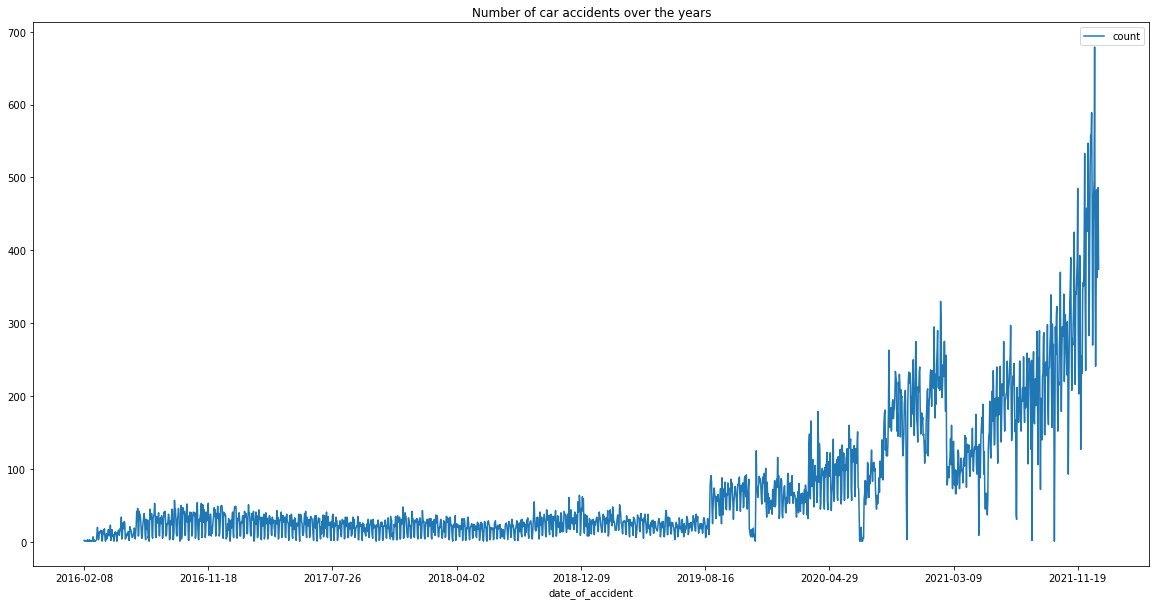

In [8]:
# car accidents over the years
df_date = df.select('date_of_accident').groupBy('date_of_accident').count().orderBy('date_of_accident').toPandas()
df_date_chart = df_date.plot.line(title = 'Number of car accidents over the years', x='date_of_accident', figsize= (20,10))

In [9]:
# create pivot table
distinct_severity = [x.Severity for x in df.select('Severity').distinct().collect()].sort()
df_county= df.groupBy('hour_of_accident').pivot('Severity',distinct_severity).count().orderBy('hour_of_accident')

In [10]:
# pivot the state and hour of accident
df_county = df_county.toPandas().set_index('hour_of_accident')
df_county = df_county.fillna(0)
df_county = df_county.applymap('{:,.0f}'.format)
df_county.head(25)

,1,2,3,4
hour_of_accident,,,,
00,11,"3,035",154,266
01,11,"2,728",100,155
02,12,"2,470",103,164
03,12,"2,195",134,181
04,19,"2,240",129,171
05,28,"3,497",230,257
06,40,"4,920",307,258
07,45,"5,988",395,305
08,76,"5,566",390,308


In [11]:
# top 10 cities with car accidents
# create pivot table
df_city= df.groupBy('City').pivot('Severity',distinct_severity).count()
df_city = df_city.fillna(0) \
                 .withColumn('total', F.col('1') + F.col('2') + F.col('3') + F.col('4')) \
                 .orderBy(F.desc('total')) \
                 .drop('total')

df_city.limit(10).toPandas().set_index('City').head(11)

,1,2,3,4
City,,,,
Miami,4,5128,115,63
Los Angeles,0,3284,95,44
Orlando,20,2650,51,32
Dallas,0,1783,273,44
Houston,0,1677,293,47
Sacramento,28,1629,34,8
Charlotte,23,1583,46,21
San Diego,0,1234,40,17
Raleigh,21,1087,19,19


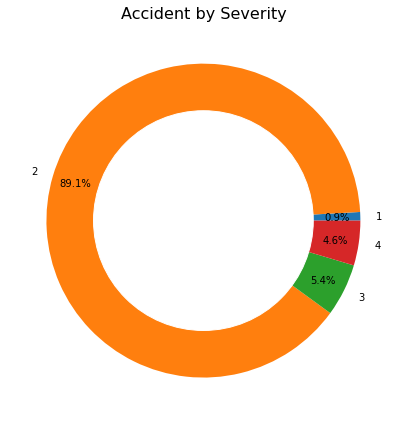

In [12]:
# create visualization of Severity (how many times each category appears in the data set)
df_severity = df.select('ID','Severity').toPandas().groupby('Severity').count()['ID']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(df_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [13]:
# create list of numerical and categorical columns 
numerical_cols = df.columns[21:29]
categorical_cols = df.columns[29:47]

#lets try drop na
df_test = df.na.drop('any')

for i in categorical_cols:
    df_test = df_test.withColumn(i,F.col(i).cast(StringType()))
    
df_test = df_test.drop('Wind_Direction')
numerical_cols.remove('Wind_Direction')

In [14]:
# use OneHotEncoder to convert categorical columns into vectors
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, VectorIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

list_of_cols = categorical_cols

stringIndexer = [StringIndexer(inputCol=i, outputCol=i + "_index").fit(df_test) for i in list_of_cols]

encoders = [OneHotEncoder(dropLast=False, inputCol=indexer.getOutputCol(), outputCol="job_vec_"+indexer.getOutputCol()) for indexer in stringIndexer]

list_of_encoders = [encoder.getOutputCol() for encoder in encoders]
list_of_encoders = numerical_cols + list_of_encoders 

vector_assembler = VectorAssembler(inputCols=list_of_encoders, outputCol="features")

pipeline = Pipeline(stages = stringIndexer + encoders + [vector_assembler])
model = pipeline.fit(df_test)
df = model.transform(df_test)

# Model

In [15]:
# create model and split the data
from pyspark.ml.regression import GBTRegressor

va_df = df.select(['features','Severity'])
(train, test) = va_df.randomSplit([0.8, 0.2], seed=123)

gbtr = GBTRegressor(featuresCol='features', labelCol='Severity', maxIter=100)
gbtr = gbtr.fit(train)

In [16]:
# test our model and print indexes
mdata = gbtr.transform(test)
mdata.show(3)
 
rmse=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="rmse")
rmse=rmse.evaluate(mdata) 
 
mae=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="mae")
mae=mae.evaluate(mdata) 
 
r2=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="r2")
r2=r2.evaluate(mdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+--------+------------------+
|            features|Severity|        prediction|
+--------------------+--------+------------------+
|(99,[0,1,2,3,4,5,...|       2| 1.979339105064023|
|(99,[0,1,2,3,4,5,...|       2| 2.064938614489724|
|(99,[0,1,2,3,4,5,...|       2|2.1196303482938963|
+--------------------+--------+------------------+
only showing top 3 rows

RMSE:  0.3871195185158367
MAE:  0.15169110276042497
R-squared:  0.024270562624979286


In [17]:
# add new columns that will check if prediction is correct after rounding up the value
mdata = mdata.withColumn('prediction',F.round(F.col('prediction'),0)) \
             .withColumn('check', F.when(F.col('Severity') == F.col('prediction'), 1).otherwise(0))

In [20]:
# create table with % of predicted values
final_view = mdata.select('check').groupBy('check').count() \
                  .withColumn('check', 
                              F.when(F.col('check') == 1, F.regexp_replace(F.col('check'), '1', 'Predicted correctly'))
                              .otherwise('Predicted incorrectly'))

final_view = final_view.withColumn('ratio', F.col('count')/final_view.groupBy().sum().collect()[0][0]) \
                       .toPandas()
final_view.head()

,check,count,ratio
0,Predicted correctly,8871,0.937
1,Predicted incorrectly,592,0.063


<Figure size 12000x8000 with 0 Axes>

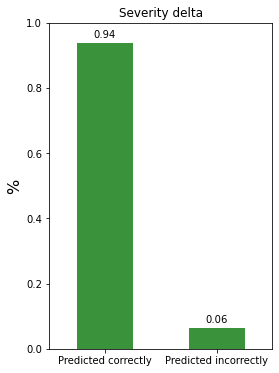

In [19]:
# visualize the data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.pyplot.figure(dpi=2000) #improve the quality
plt.figure(figsize=(4, 6))
plt.title('Severity delta')
splot=sns.barplot(x="check", y="ratio", color = 'tab:green', data=final_view)
splot.set(xlabel=None)  # remove the axis label
plt.ylim([0, 1])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("%", size=16)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(splot, .5)